In [ ]:
# !pip install tweepy
# !pip install textblob
# !pip install regex
# !pip install wordcloud

In [32]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [6]:
#Twitter API Credentials
APIKey="yJvB2GIYq1ELdy81qH9N4tiPh"
APISecretKey="xv3R14f3kiZvpkTkRUedjcFfUl2buo55CaTqFYUTx5iGGoyLIT"
accessToken="1262041138061426688-JEY02X8syjTOejtzSYw4duL1OXDzAC"
accessTokenSecret="RKDRY9HFdjoyW1ewk0jHx3ZjBtB4ogOppUuv7Tf1ITwge"

In [7]:
# create the authentication object

authenticate=tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate)

In [8]:
#get the data

posts=api.user_timeline(screen_name="tcs",count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:
    print(str(i)+')'+tweet.full_text+'\n')
    i+=1

Unexpected parameter: lang


1)Here's a recap of some exciting happenings at #TCS from around the world! #ICYMI 

Learn more: https://t.co/fGFko2pPyZ

Kantar BrandZ: https://t.co/RG6Cj0UxiU

2)Our number 1 ranking in the #KantarBrandz Top 75 most valuable Indian Brands 2022 is a reflection of the trust showcased by our customers and the incredible passion and dedication of our employees!

#BuildingOnBelief https://t.co/Lh4YCU1hu6

3)#Sustainability is now at the heart of business strategy.

Join us for this #LinkedinLive, where expert speakers will discuss key environmental and social sustainability trends within the #lifesciences and #healthcare industry: https://t.co/E4yxynZ9o2 @TCS_UKI https://t.co/BKEq0cgWo5

4)“The new future-ready #digital platform built by TCS will help Penumbra drive differentiated business capabilities delivering superior user and end #customerexperiences.” - V Rajanna, Global Head, Communications, Media, and Technology Business, TCS.

Read: https://t.co/2dDOtop3lN https://t.co/ThthlGgb7s

In [9]:
#create dataframe with column called tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [10]:
df

,Tweets
0,Here's a recap of some exciting happenings at ...
1,Our number 1 ranking in the #KantarBrandz Top ...
2,#Sustainability is now at the heart of busines...
3,“The new future-ready #digital platform built ...
4,As operators in emerging economies face signif...
...,...
95,Download links for #TCSQ1 FY 23:\nIFRS (USD): ...
96,Won two @GoogleCloud Partner of the Year 2021 ...
97,Won three 2022 @Microsoft Partner of the Year ...
98,Recognized as the Information Technology Secto...


In [11]:
##CLEANING DATA
import regex as re   #lib for string data

def cleanTxt(text):
    text=re.sub('@[A-Za-z0-9]+','',text)    #removing mentions
    text=re.sub("#","",text)    #removing #
    text=re.sub("RT[\s]+",'',text)   #removing retweets
    text=re.sub('https?:\/\/\S+','',text)    #remove links
    return text

In [13]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [14]:
df

,Tweets
0,Here's a recap of some exciting happenings at ...
1,Our number 1 ranking in the KantarBrandz Top 7...
2,Sustainability is now at the heart of business...
3,“The new future-ready digital platform built b...
4,As operators in emerging economies face signif...
...,...
95,Download links for TCSQ1 FY 23:\nIFRS (USD): \...
96,Won two Partner of the Year 2021 awards in th...
97,Won three 2022 Partner of the Year awards in ...
98,Recognized as the Information Technology Secto...


In [15]:
analysis=TextBlob("hey i love weather")

In [16]:
analysis.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [17]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [18]:
df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [19]:
df

,Tweets,Subjectivity,Polarity
0,Here's a recap of some exciting happenings at ...,0.650000,0.437500
1,Our number 1 ranking in the KantarBrandz Top 7...,0.633333,0.666667
2,Sustainability is now at the heart of business...,0.533333,0.016667
3,“The new future-ready digital platform built b...,0.338636,0.209091
4,As operators in emerging economies face signif...,0.875000,0.375000
...,...,...,...
95,Download links for TCSQ1 FY 23:\nIFRS (USD): \...,0.000000,0.000000
96,Won two Partner of the Year 2021 awards in th...,0.000000,0.000000
97,Won three 2022 Partner of the Year awards in ...,0.000000,0.000000
98,Recognized as the Information Technology Secto...,0.000000,0.000000


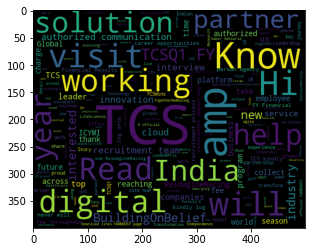

In [22]:
#Word cloud Visualisation

allwords=' '.join([i for i in df['Tweets']])
cloud=WordCloud(width=500,height=400,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(cloud)
plt.show()

In [23]:
#Function to compute =,- or neutral

def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score>0:
        return "Positive"
    else:
        return "Neutral"
    
    
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [24]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Here's a recap of some exciting happenings at ...,0.650000,0.437500,Positive
1,Our number 1 ranking in the KantarBrandz Top 7...,0.633333,0.666667,Positive
2,Sustainability is now at the heart of business...,0.533333,0.016667,Positive
3,“The new future-ready digital platform built b...,0.338636,0.209091,Positive
4,As operators in emerging economies face signif...,0.875000,0.375000,Positive
...,...,...,...,...
95,Download links for TCSQ1 FY 23:\nIFRS (USD): \...,0.000000,0.000000,Neutral
96,Won two Partner of the Year 2021 awards in th...,0.000000,0.000000,Neutral
97,Won three 2022 Partner of the Year awards in ...,0.000000,0.000000,Neutral
98,Recognized as the Information Technology Secto...,0.000000,0.000000,Neutral


In [25]:
df['Analysis'].value_counts()

Positive    64
Neutral     31
Negative     5
Name: Analysis, dtype: int64

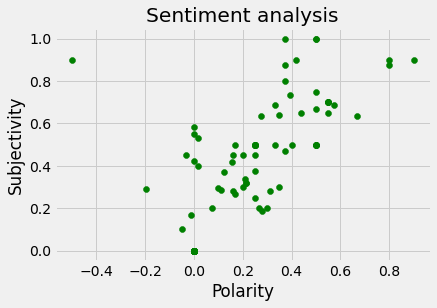

In [33]:
# Plotting Scatter Plot
plt.figure
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df["Subjectivity"][i],color='green')
    

plt.title("Sentiment analysis")
plt.xlabel('Polarity')
plt.ylabel("Subjectivity")
plt.show()

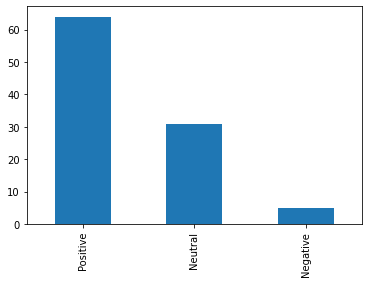

In [30]:
df['Analysis'].value_counts().plot(kind='bar')
plt.show()